In [31]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt

In [32]:
raw_poly_data = np.loadtxt("poly_data.csv", delimiter=" ")
print(str("Shape of Data: {}").format(raw_poly_data.shape))

Shape of Data: (200, 2)


In [106]:
number_of_splits = 5
polynomial_degree_array = np.arange(1, 41, 1)
mse_error_array = []

In [107]:
for poly_degree in polynomial_degree_array:
    poly = PolynomialFeatures(degree=poly_degree)
    transformed_poly_data = poly.fit_transform(raw_poly_data[:, 0].reshape(-1, 1))
    linear_regression_obj = LinearRegression()

    _ = linear_regression_obj.fit(transformed_poly_data, raw_poly_data[:, 1])

    if(poly_degree % 5 == 0):
        print (str("Polynomial Degree: {:2d}; Training Accuracy: {:3.1f}%").format(poly_degree, linear_regression_obj.score(transformed_poly_data, raw_poly_data[:, 1])*100))

    cross_validation_obj = KFold(n_splits=number_of_splits)
    computed_cross_val_scores = -1 * cross_val_score(linear_regression_obj, transformed_poly_data, raw_poly_data[:, 1], scoring='neg_mean_squared_error',cv=cross_validation_obj)

    mse_error_array.append(computed_cross_val_scores)

Polynomial Degree:  5; Training Accuracy: 94.7%
Polynomial Degree: 10; Training Accuracy: 94.8%
Polynomial Degree: 15; Training Accuracy: 94.9%
Polynomial Degree: 20; Training Accuracy: 95.0%
Polynomial Degree: 25; Training Accuracy: 95.1%
Polynomial Degree: 30; Training Accuracy: 76.4%
Polynomial Degree: 35; Training Accuracy: 60.0%
Polynomial Degree: 40; Training Accuracy: 54.9%


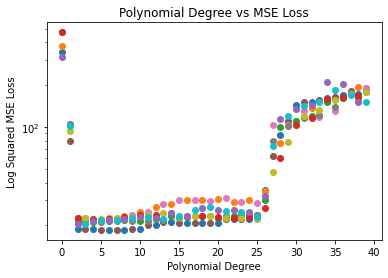

In [110]:
mse_error_array = np.array(mse_error_array)
for poly_degree in range(polynomial_degree_array[-1]):
    for split in range(number_of_splits):
        plt.scatter(poly_degree, mse_error_array[poly_degree][split])

plt.title("Polynomial Degree vs MSE Loss")
plt.ylabel("Log Squared MSE Loss")
plt.xlabel("Polynomial Degree")
plt.yscale('log')
plt.show()
